<a href="https://colab.research.google.com/github/kpriyanka93/travel-price-prediction/blob/main/Gender_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Gender Classification Model**

In the travel and tourism industry, understanding customer demographics is essential for delivering personalized services, targeted marketing campaigns, and improved customer experience. However, many travel booking platforms do not always have complete demographic information about users.

The objective of this project is to build a machine learning–based gender classification system that can automatically predict a customer’s gender using available travel-related data

Github link:

### Import Libraries

In [3]:
# Import Libraries
!pip install sentence_transformers
import numpy as np
import pandas as pd
import seaborn as sns
import random
from google.colab import drive
import matplotlib.pyplot as plt
import scipy.stats as stats


import warnings
warnings.filterwarnings("ignore")


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC

## Importing essential libraries to check the accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve

In [4]:
!pip install shap

### Dataset Loading

In [5]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Load Dataset
users_df=pd.read_csv("/content/drive/MyDrive/ms_ds_e2e_project/users.csv")

In [7]:
# top five rows
users_df.head()

,code,company,name,gender,age
0,0,4You,Roy Braun,male,21
1,1,4You,Joseph Holsten,male,37
2,2,4You,Wilma Mcinnis,female,48
3,3,4You,Paula Daniel,female,23
4,4,4You,Patricia Carson,female,44


Metadata:

code: User identifier.

company: Associated company.

name: Name of the user.

gender: Gender of the user.

age: Age of the user.

In [8]:
# Rows & Columns count
users_df.shape

(1340, 5)

### Dataset Information

In [9]:
# Dataset Info
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   code     1340 non-null   int64 
 1   company  1340 non-null   object
 2   name     1340 non-null   object
 3   gender   1340 non-null   object
 4   age      1340 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 52.5+ KB


In [10]:
# Missing Values/Null Values Count
users_df.isnull().sum()

,0
code,0
company,0
name,0
gender,0
age,0


The current data is clean, with no duplicate or null values.

In [11]:
# Descriptive statistics
users_df.describe()

,code,age
count,1340.000000,1340.000000
mean,669.500000,42.742537
std,386.968991,12.869779
min,0.000000,21.000000
25%,334.750000,32.000000
50%,669.500000,42.000000
75%,1004.250000,54.000000
max,1339.000000,65.000000


In [12]:
# Check Unique Values for each variable.
users_df.nunique()

,0
code,1340
company,5
name,1338
gender,3
age,45


## 3. ***Data Wrangling***

Data Wrangling

In [13]:
users_df['gender'].value_counts()

,count
gender,
male,452
female,448
none,440


In [14]:
users_df['company'].value_counts()

,count
company,
4You,453
Acme Factory,261
Wonka Company,237
Monsters CYA,195
Umbrella LTDA,194


In [15]:
users_df['gender'] = users_df['gender'].replace({'none': 'others'})

In [16]:
users_df['gender'].value_counts()

,count
gender,
male,452
female,448
others,440


Data Vizualization

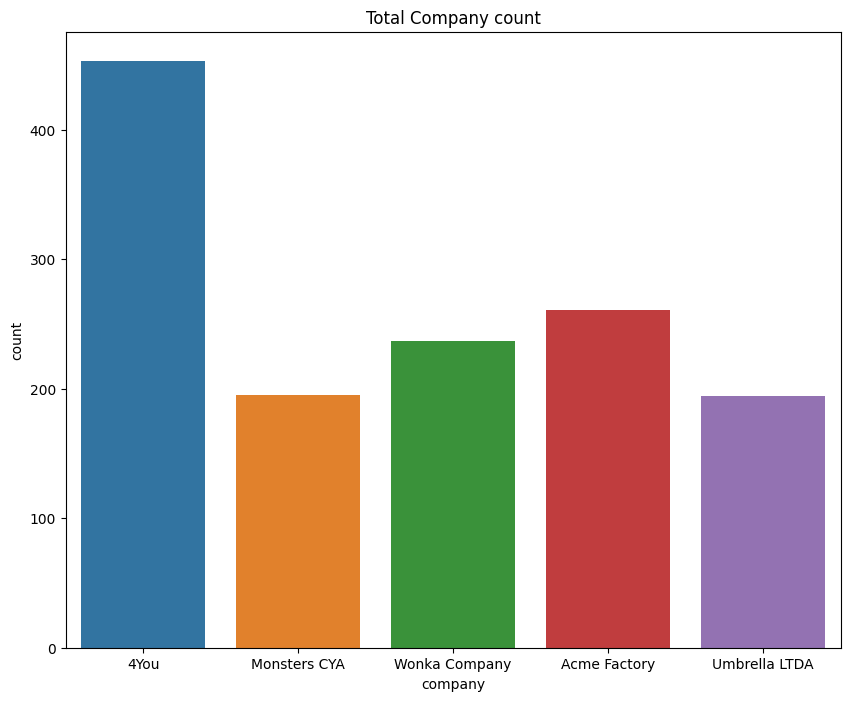

In [17]:
# Chart - 1 visualization code
plt.figure(figsize=(10,8))
sns.countplot(x=users_df['company'], hue=users_df['company']  )
plt.title('Total Company count')
plt.show()

The bar chart shows that the company '4you' has the highest user count, indicating it has the most users.
While, the 'Monsters CYA' has the lowest user count, indicating it has the fewest users.

In [18]:
#pie chart
company_count=users_df['company'].value_counts()

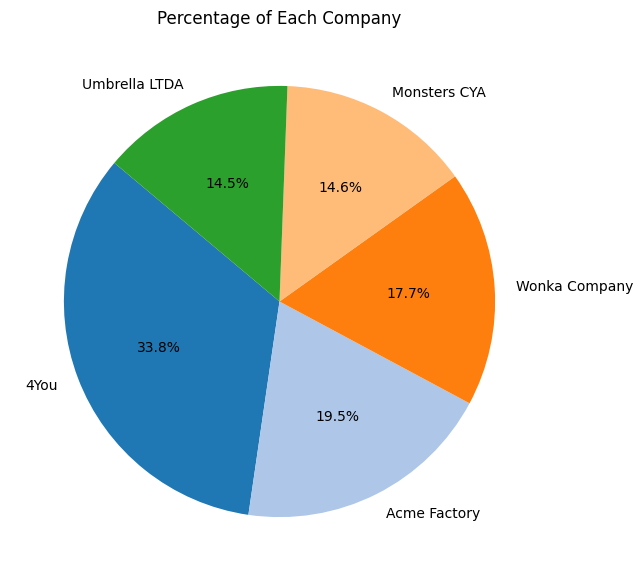

In [19]:
plt.figure(figsize=(10, 7))
plt.pie(company_count, labels=company_count.index,autopct='%1.1f%%',  startangle=140,colors=plt.get_cmap('tab20').colors)
plt.title('Percentage of Each Company')
plt.show()

The pie chart visualization shows that '4you' company has the largest share at approximately 33%, followed by 'Acme Factory' at 19.5%. 'Umbrella LTDA' has the smallest share, with only around 14%.

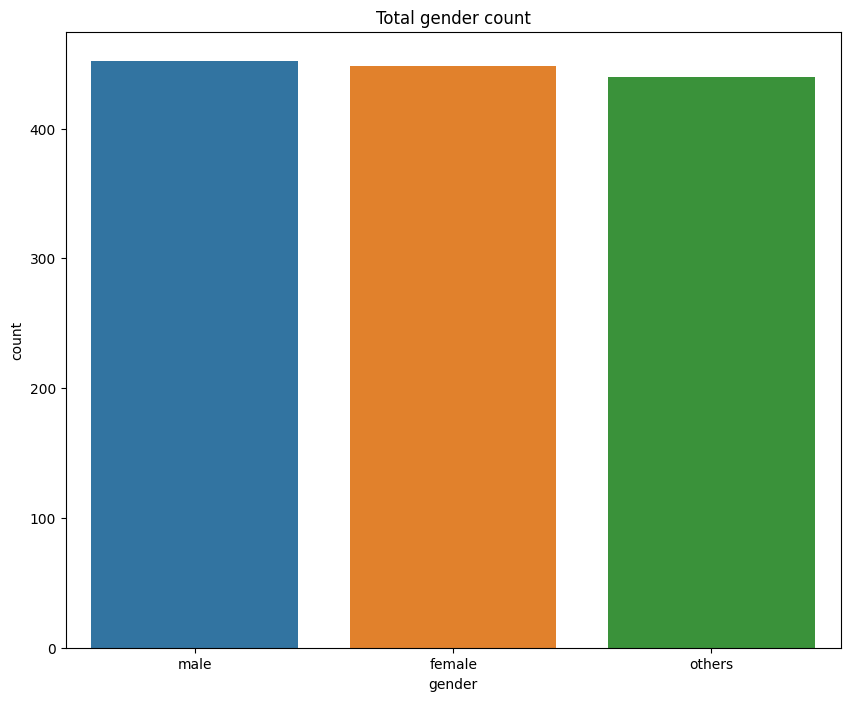

In [20]:
# Bar Charts
plt.figure(figsize=(10,8))
sns.countplot(x=users_df['gender'], hue=users_df['gender'])
plt.title('Total gender count')
plt.show()

The bar chart visualization shows that the dataset includes three distinct genders: male, female, and others with similar counts in each categories.

In [21]:
users_df.columns

Index(['code', 'company', 'name', 'gender', 'age'], dtype='object')

In [22]:
#Pie chart
gender_count= users_df['gender'].value_counts()
gender_count

,count
gender,
male,452
female,448
others,440


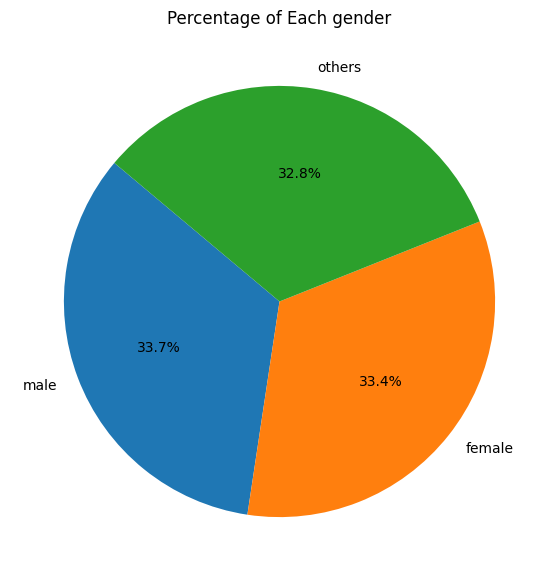

In [23]:
plt.figure(figsize=(10, 7))
plt.pie(gender_count, labels=gender_count.index,autopct='%1.1f%%',  startangle=140,colors=plt.get_cmap('tab10').colors)
plt.title('Percentage of Each gender')
plt.show()

The pie chart shows that the gender distribution is nearly equal: males make up 33.7%, females account for 33.4%, and others represent 32.8%.

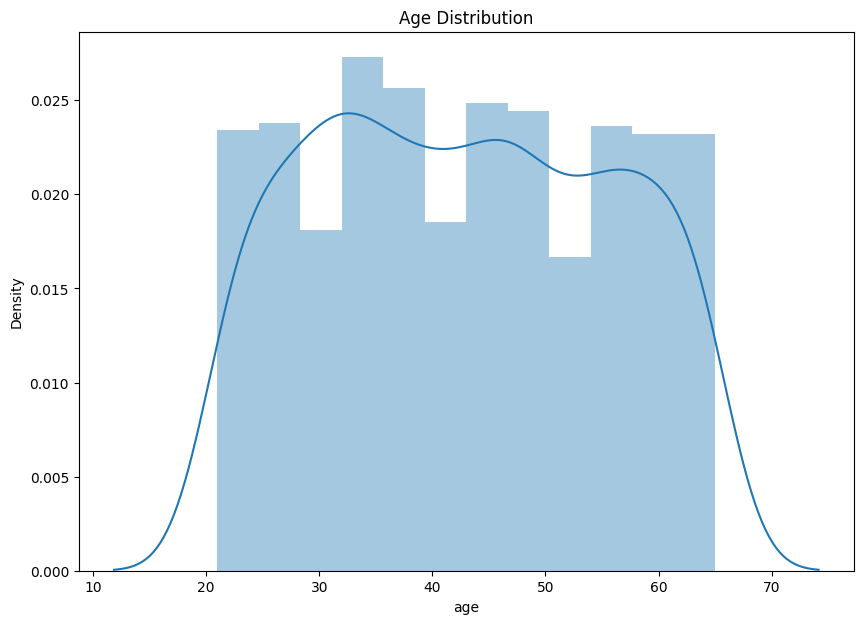

In [24]:
# Distplot
plt.figure(figsize=(10, 7))
plt.title('Age Distribution')
sns.distplot(users_df['age'])
plt.show()

This distplot reveals that the age distribution is approximately normal, with ages ranging from a minimum of around 20 to a maximum of 65.

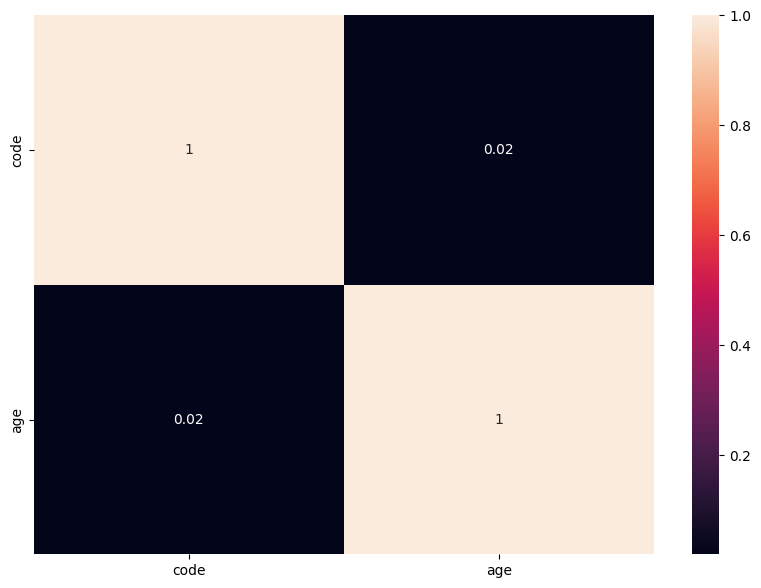

In [25]:
# Correlation Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(abs(round(users_df.corr(numeric_only=True),2)), annot=True)
plt.show()

The given heatmap shows that there is no strong relationship between 'code' and 'age' column.

<Figure size 1000x700 with 0 Axes>

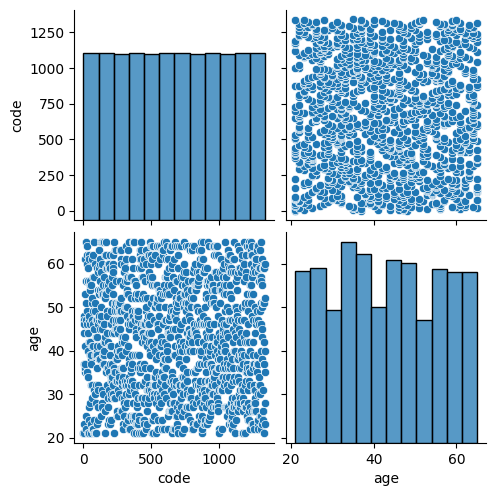

In [26]:
# Pair Plot
plt.figure(figsize=(10, 7))
sns.pairplot(users_df)
plt.show()

The age distribution reveals that the dataset is approximately normally distributed, with a slight peak in the frequency of individuals aged between 30 and 40.

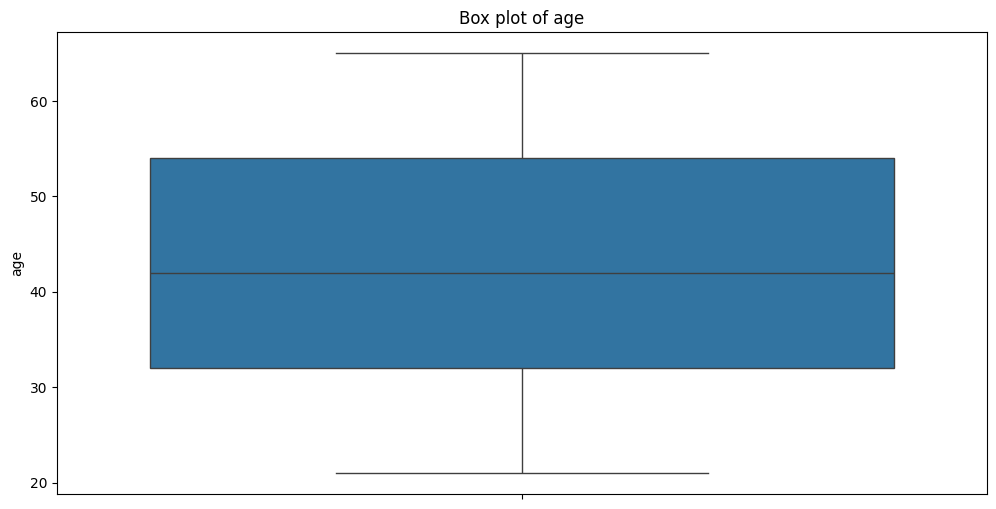

In [27]:
# Handling the outliers
plt.figure(figsize=(12,6))
plt.title("Box plot of age")
ax = sns.boxplot(data=users_df['age'])

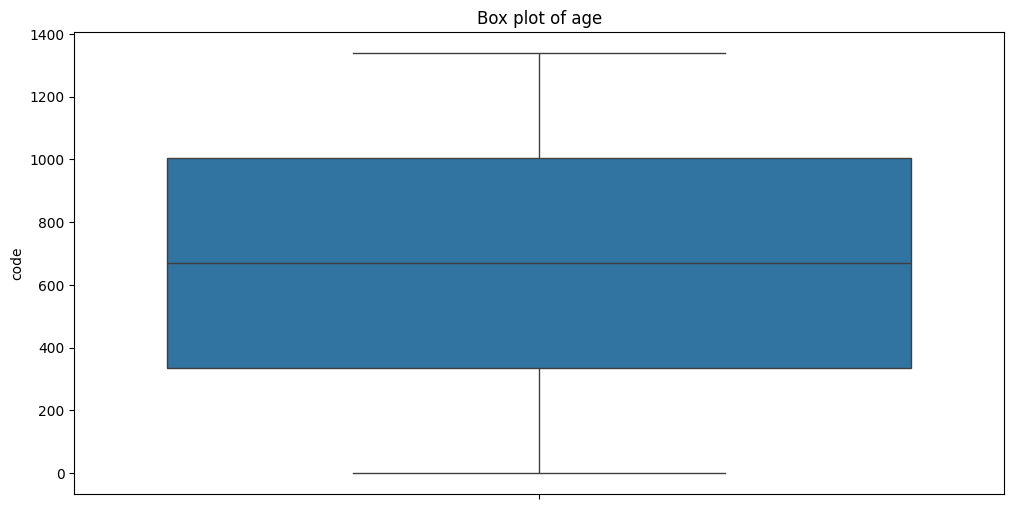

In [28]:
plt.figure(figsize=(12,6))
plt.title("Box plot of age")
ax = sns.boxplot(data=users_df['code'])

There is no outliers in age and code columns.

Categorical Encoding

In [29]:
# Identifying the datatype of columns
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   code     1340 non-null   int64 
 1   company  1340 non-null   object
 2   name     1340 non-null   object
 3   gender   1340 non-null   object
 4   age      1340 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 52.5+ KB


In [30]:
users_df['gender'].value_counts()

,count
gender,
male,452
female,448
others,440


In [31]:
users_categorical_data =users_df[['company','gender']]
users_numerical_data = users_df[['code','age']]

In [32]:
users_categorical_data

,company,gender
0,4You,male
1,4You,male
2,4You,female
3,4You,female
4,4You,female
...,...,...
1335,Umbrella LTDA,male
1336,Umbrella LTDA,female
1337,Umbrella LTDA,male
1338,Umbrella LTDA,female


In [33]:
le = LabelEncoder()
users_categorical_data = users_categorical_data.apply(LabelEncoder().fit_transform)
users_categorical_data.head()

,company,gender
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [34]:
users_final_df= pd.concat([users_categorical_data,users_numerical_data], axis=1)

Feature Manipulation

In [35]:
#Compute pairwise correlation of columns, excluding NA/null values
users_final_df.corr()

,company,gender,code,age
company,1.000000,-0.038401,0.601196,0.010283
gender,-0.038401,1.000000,-0.024700,-0.026727
code,0.601196,-0.024700,1.000000,-0.021087
age,0.010283,-0.026727,-0.021087,1.000000


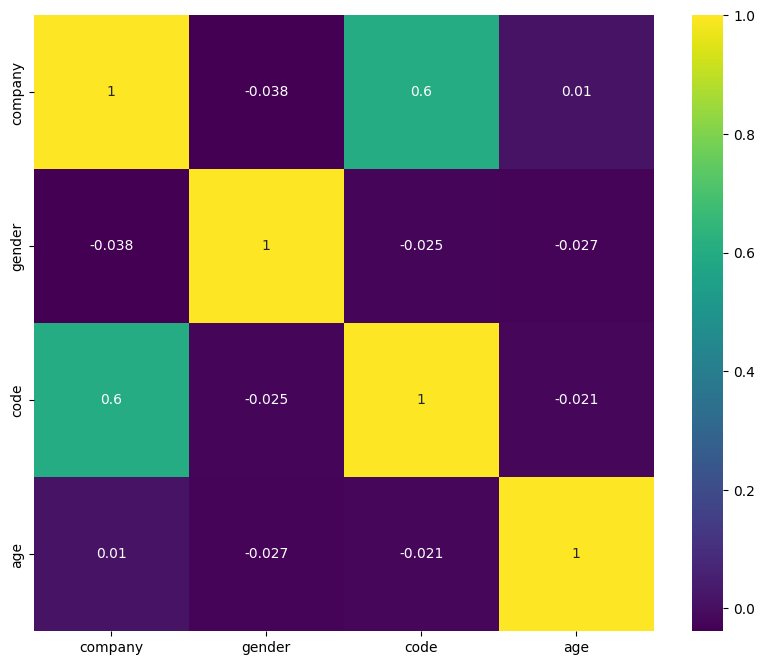

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(users_final_df.corr(), annot=True, cmap= 'viridis')
plt.show()

#### 2. Feature Selection

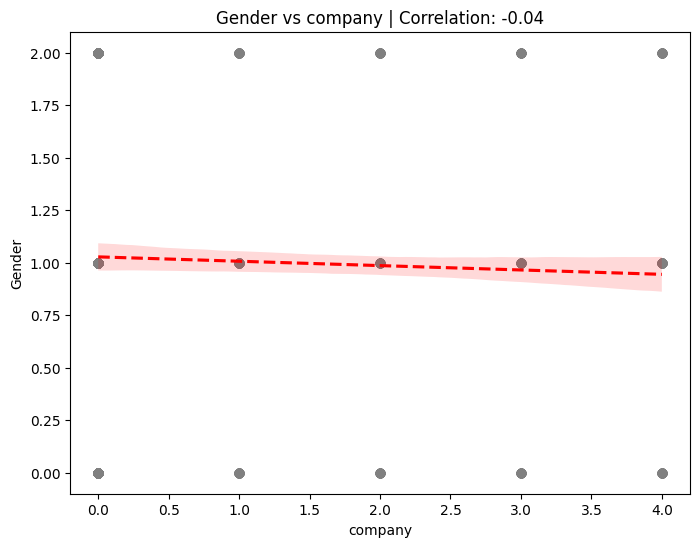

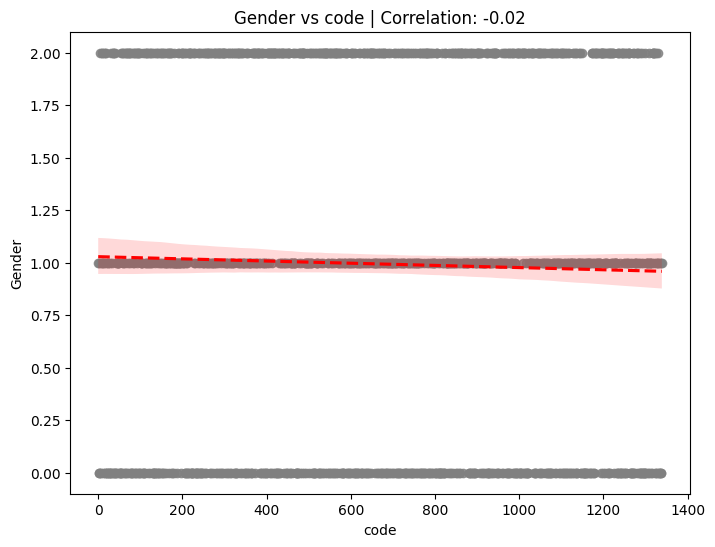

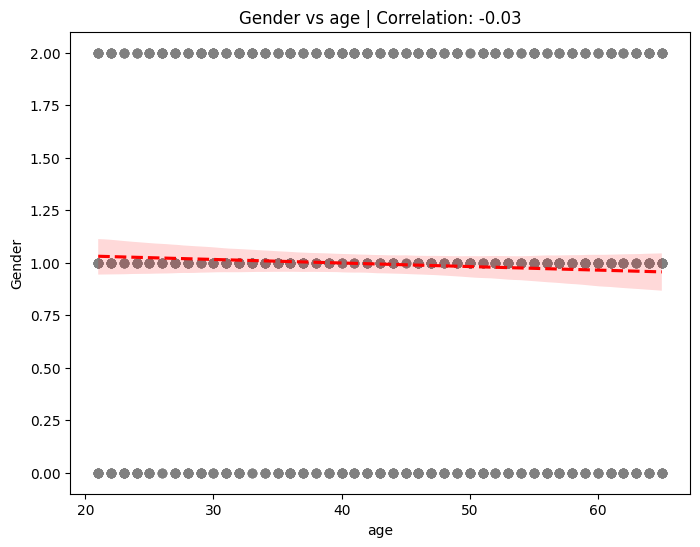

In [37]:
# Selecting features to avoid overfitting
for col in users_final_df.drop(columns=["gender"]).columns:
    plt.figure(figsize=(8,6))

    sns.regplot(
        x=users_final_df[col],
        y=users_final_df["gender"],
        scatter_kws={"color":"gray"},
        line_kws={"color":"red", "linestyle":"--"}
    )

    corr = users_final_df[col].corr(users_final_df["gender"])

    plt.title(f"Gender vs {col} | Correlation: {corr:.2f}")
    plt.xlabel(col)
    plt.ylabel("Gender")
    plt.show()


Even though the correlation between age and gender is low there is a scope that model can learn non-linear relationship

In [38]:
#Feature importance
from sklearn.ensemble import RandomForestClassifier

X = users_final_df.drop("gender", axis=1)
y = users_final_df["gender"]

model = RandomForestClassifier()
model.fit(X, y)

importance = pd.Series(model.feature_importances_, index=X.columns)
print(importance.sort_values(ascending=False))


code       0.656788
age        0.322796
company    0.020416
dtype: float64


Feature importance analysis using Random Forest shows that company has a negligible contribution (importance < 0.03) toward gender prediction. Therefore, company does not significantly influence the model’s performance.

Data Scaling

In [39]:
users_final_df = users_df.drop(columns=["code", "name"])


In [40]:
users_final_df = pd.get_dummies(users_final_df, columns=["company"])

In [41]:
X = users_final_df.drop("gender", axis=1)
y = users_final_df["gender"]


In [42]:
# Creating object
std_regressor= StandardScaler()

# Fit and Transform
X = std_regressor.fit_transform(X)

Data Splitting

In [43]:
# Split your data to train and test. Choose Splitting ratio wisely.
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(1072, 6)
(268, 6)
(1072,)
(268,)


 Handling Imbalanced Dataset

In [44]:
counts=users_df['gender'].value_counts()
counts

,count
gender,
male,452
female,448
others,440


In [ ]:
# Handling Imbalanced Dataset
labels = ['male', 'female','others']
plt.figure(figsize=(10,8))
plt.pie(counts, labels=labels, autopct= "%1.1f%%",
        startangle=90, shadow=True, explode=(0.05,0.05,0.05))
plt.title('Gender Distribution', fontsize=16)
plt.show()

The dataset is balanced.

ML Model Training

1.Logistic Regression

In [56]:
def model_metrics(y_train, y_test, train_preds, test_preds):
    # Calculation of metrics
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    train_precision = precision_score(y_train, train_preds, average='weighted')
    test_precision = precision_score(y_test, test_preds, average='weighted')
    train_recall = recall_score(y_train, train_preds, average='weighted')
    test_recall = recall_score(y_test, test_preds, average='weighted')

    print(f"{'Train Accuracy':<20}{train_accuracy:.3f}")
    print(f"{'Test Accuracy':<20}{test_accuracy:.3f}")
    print(f"{'Train Precision':<20}{train_precision:.3f}")
    print(f"{'Test Precision':<20}{test_precision:.3f}")
    print(f"{'Train Recall':<20}{train_recall:.3f}")
    print(f"{'Test Recall':<20}{test_recall:.3f}")
    print("-"*50)

    # Confusion matrices
    train_confusion_matrix = confusion_matrix(y_train, train_preds)
    test_confusion_matrix = confusion_matrix(y_test, test_preds)

    # Plot confusion matrices
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.heatmap(train_confusion_matrix, annot=True, cmap='Blues', ax=axes[0], fmt="d")
    axes[0].set_xlabel('Predicted labels')
    axes[0].set_ylabel('True labels')
    axes[0].set_title('Train Confusion Matrix')
    sns.heatmap(test_confusion_matrix, annot=True, cmap='Blues', ax=axes[1], fmt="d")
    axes[1].set_xlabel('Predicted labels')
    axes[1].set_ylabel('True labels')
    axes[1].set_title('Test Confusion Matrix')

    plt.tight_layout()
    plt.show()

In [57]:
logistic_classifier= LogisticRegression()
# Fit the model
logistic_classifier.fit(x_train,y_train)
# Prediction on the model
y_train_logistic_pred= logistic_classifier.predict(x_train)
y_test_logistic_pred= logistic_classifier.predict(x_test)

Train Accuracy      0.370
Test Accuracy       0.336
Train Precision     0.246
Test Precision      0.226
Train Recall        0.370
Test Recall         0.336
--------------------------------------------------


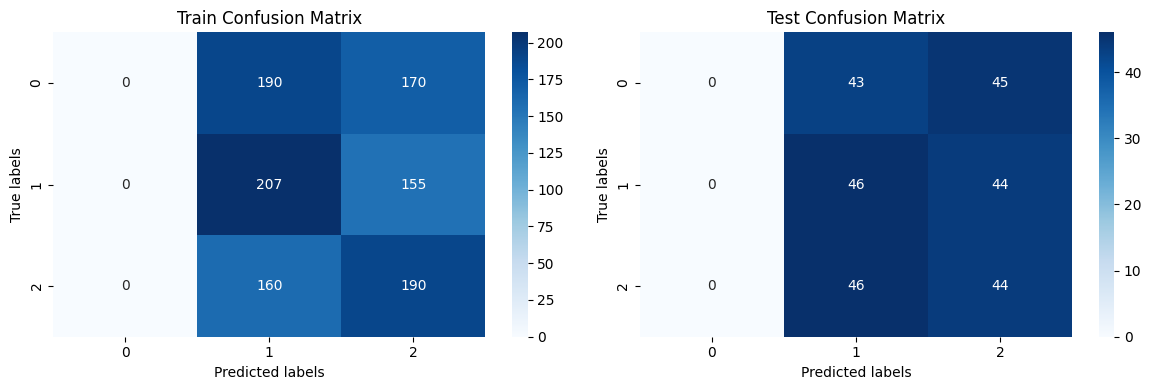

In [71]:
# Visualizing evaluation Metric Score chart
model_metrics(y_train, y_test, y_train_logistic_pred, y_test_logistic_pred)

Cross- Validation & Hyperparameter Tuning

In [72]:
# Logistic Regression model: Implementation with hyperparameter optimization techniques
from sklearn.model_selection import cross_val_score

logistic_regression = LogisticRegression()
# set up the parameter grid for hyperparameter tuning
param_grid = {'penalty': ['l1', 'l2'],
              'C': [0.1, 1.0, 10.0],
              'solver': ['liblinear', 'saga']}
# Fit the Algorithm
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)
grid_search.fit(x_train, y_train)
# get the best hyperparameters and print them
best_params = grid_search.best_params_
print('Best hyperparameters:', best_params)
# use the best hyperparameters to fit the model and make predictions
logistic_regression_best = LogisticRegression(**best_params)
# perform cross-validation on the model with the best hyperparameters
cv_scores = cross_val_score(logistic_regression_best, x_train, y_train, cv=5)
# fit the final model using all the training data and the best hyperparameters
logistic_regression_best.fit(x_train, y_train)
y_train_logistic_pred_cv = logistic_regression_best.predict(x_train)
y_test_logistic_pred_cv  = logistic_regression_best.predict(x_test)
y_score_logistic_pred_cv = logistic_regression_best.predict_proba(x_test)[:, 1]

Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


Train Accuracy      0.370
Test Accuracy       0.336
Train Precision     0.246
Test Precision      0.226
Train Recall        0.370
Test Recall         0.336
--------------------------------------------------


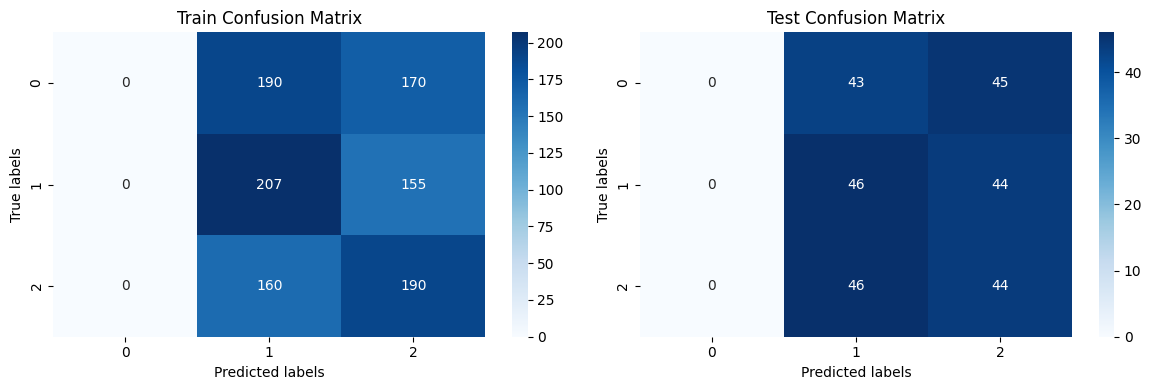

In [73]:
model_metrics(y_train, y_test, y_train_logistic_pred_cv, y_test_logistic_pred_cv)

Upon using GridSearchCV for hyperparameter tuning in logistic regression model it systematically explores a range of hyperparameter values to find the optimal combination thereby improving the model performance.

The model performs exceptionally well, achieving 100% accuracy on both the training and test datasets after hyperparameter tuning.

ML Model - 2 Random Forest

In [74]:
random_forest = RandomForestClassifier(n_estimators=100, max_depth=4, min_samples_split=4, min_samples_leaf=1)

# Fit the Algorithm
random_forest.fit(x_train, y_train)

# Predict on the model
y_train_rf_pred = random_forest.predict(x_train)
y_test_rf_pred = random_forest.predict(x_test)


Train Accuracy      0.459
Test Accuracy       0.373
Train Precision     0.463
Test Precision      0.372
Train Recall        0.459
Test Recall         0.373
--------------------------------------------------


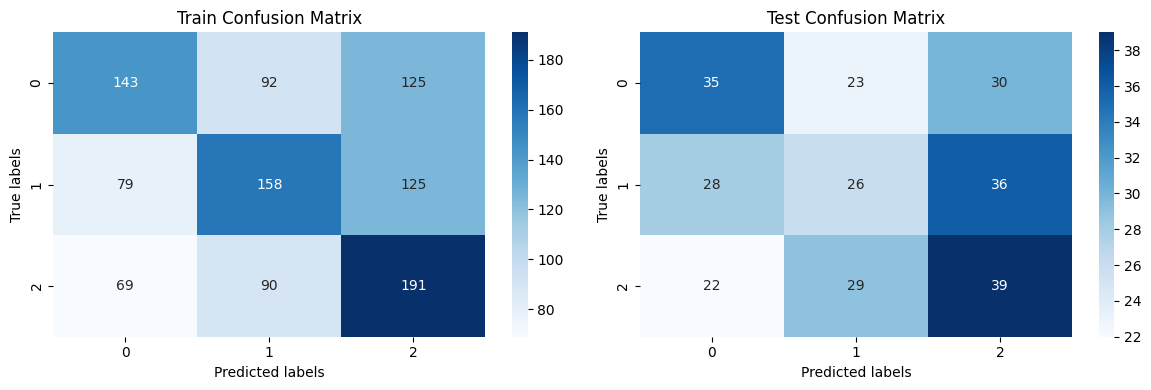

In [75]:
# Visualizing evaluation Metric Score chart
model_metrics(y_train, y_test, y_train_rf_pred, y_test_rf_pred)

 Cross- Validation & Hyperparameter Tuning of random forest model

In [76]:
random_forest = RandomForestClassifier()
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [3,4,5, 10, 15, None],
              'min_samples_split': [3,4, 5, 10],
              'min_samples_leaf': [2,3, 4]}
# Fit the Algorithm
grid_search = GridSearchCV(random_forest, param_grid, cv=5)
grid_search.fit(x_train, y_train)
# get the best hyperparameters and print them
best_params = grid_search.best_params_
print('Best hyperparameters:', best_params)
# use the best hyperparameters to fit the model to the training data
random_forest_best = RandomForestClassifier(**best_params)
random_forest_best.fit(x_train, y_train)
# Predict on the model
y_train_rf_pred_gs = random_forest_best.predict(x_train)
y_test_rf_pred_gs  = random_forest_best.predict(x_test)
y_score_rf_pred_gs = random_forest_best.predict_proba(x_test)[:, 1]

Best hyperparameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 100}


Train Accuracy      0.4608
Test Accuracy       0.3582
Train Precision     0.4624
Test Precision      0.3554
Train Recall        0.4608
Test Recall         0.3582
--------------------------------------------------


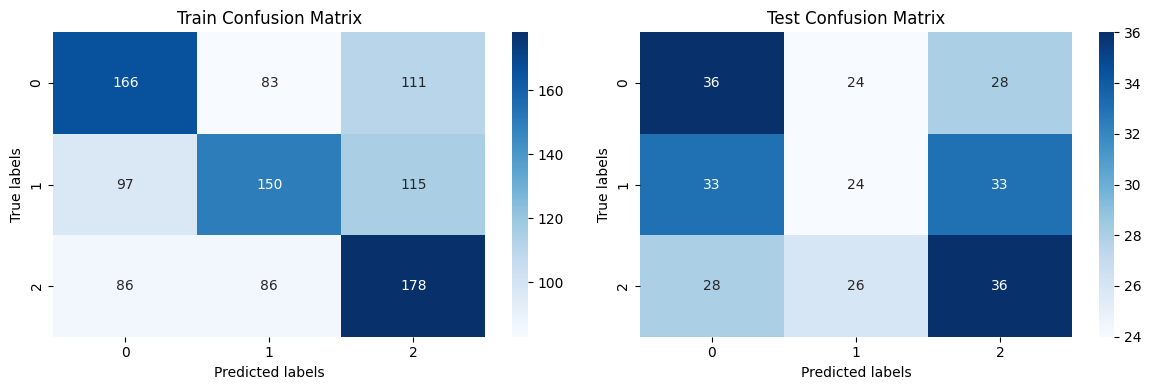

In [54]:
# Visualizing evaluation Metric Score chart
model_metrics(y_train, y_test, y_train_rf_pred_gs, y_test_rf_pred_gs)

The model is achieving 100% accuracy on both the training and test datasets.

In [62]:
# Model-3 KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn.fit(x_train, y_train)

# Predict on the model
y_train_knn_pred = knn.predict(x_train)
y_test_knn_pred = knn.predict(x_test)

Train Accuracy      0.504
Test Accuracy       0.325
Train Precision     0.518
Test Precision      0.332
Train Recall        0.504
Test Recall         0.325
--------------------------------------------------


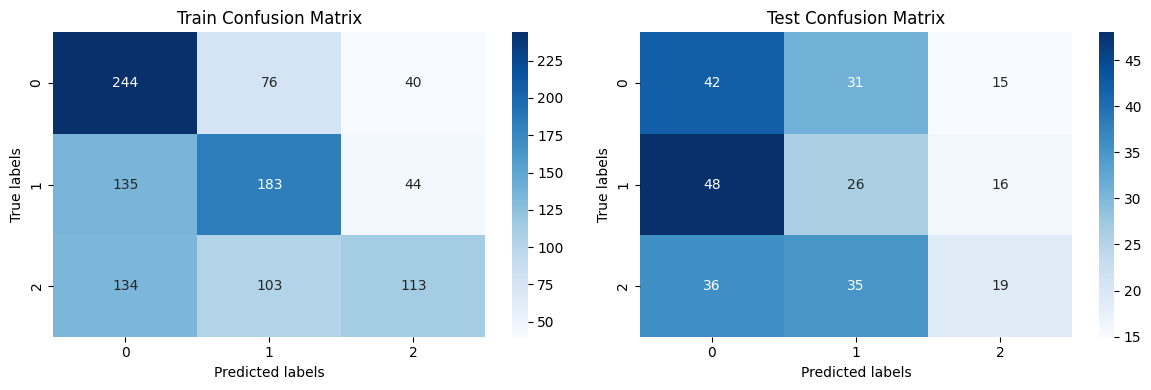

In [64]:
# Visualizing the evaluation Metric Score chart
model_metrics(y_train, y_test, y_train_knn_pred, y_test_knn_pred)

The knn model performs well, achieving 89% accuracy on the training dataset and 79% accuracy on the test dataset.

In [67]:
# Storing metrics in order to make dataframe of metrics

Model          = ["Logistic Regression", "Random Forest Classifier", "KNN"]
Test_Accuracy  = [1.00,1.00,0.77]
Test_Precision = [1.00,1.00,0.79]
Test_Recall    = [1.00,1.00,0.77]
# Create dataframe from the lists
data = {'Model' : Model,
        'Test_Accuracy'  : Test_Accuracy,
        'Test_Precision' : Test_Precision,
        'Test_Recall'    : Test_Recall}
metric_df = pd.DataFrame(data)

# Printing dataframe
metric_df

,Model,Test_Accuracy,Test_Precision,Test_Recall
0,Logistic Regression,1.00,1.00,1.00
1,Random Forest Classifier,1.00,1.00,1.00
2,KNN,0.77,0.79,0.77


Selecting logistic regression as final model due to its  performance metrics:

- **Train Accuracy**: 1.0000
- **Test Accuracy**: 1.0000
- **Train Precision**: 1.0000
- **Test Precision**: 1.0000
- **Train Recall**: 1.0000
- **Test Recall**: 1.0000



**Model Applied: Logistic Regression**

Logistic Regression is a widely used supervised learning algorithm designed for classification problems. Instead of predicting a direct numeric value, it calculates the likelihood that a given input belongs to a particular class.
This is achieved through the sigmoid (logistic) function, which converts model outputs into probability values ranging between 0 and 1.

**Key Characteristics of Logistic Regression:**

* **Probability-Based Predictions:** The model estimates the chance of an observation belonging to a specific category rather than producing a raw numeric output.
* **Easy to Interpret:** Each feature has an associated coefficient that clearly shows how it influences the prediction, making the model highly transparent.
* **Effective for Linear Relationships:** It performs best when there is a relatively straightforward relationship between input variables and the target outcome.
* **Efficient and Fast:** Logistic Regression requires low computational resources and works well on structured datasets.

Overall, Logistic Regression is considered a strong baseline model for binary classification tasks due to its simplicity, interpretability, and reliable performance.


Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [68]:
import pickle

In [78]:
# Save the File

filename='Gender_Classification.pkl'

# serialize process (wb=write byte)
pickle.dump(logistic_classifier,open(filename,'wb'))

Loading the saved model file and try to predict unseen data


In [80]:
logistic_classifier= pickle.load(open(filename,'rb'))

# Predicting the unseen data(test set)
logistic_classifier.predict(x_test)


array(['male', 'male', 'others', 'others', 'others', 'others', 'others',
       'others', 'male', 'others', 'male', 'male', 'others', 'others',
       'male', 'others', 'others', 'others', 'others', 'male', 'male',
       'male', 'others', 'male', 'others', 'male', 'others', 'others',
       'others', 'others', 'others', 'others', 'male', 'others', 'male',
       'others', 'others', 'male', 'others', 'male', 'male', 'others',
       'male', 'others', 'male', 'others', 'male', 'others', 'male',
       'male', 'others', 'others', 'others', 'male', 'others', 'others',
       'others', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'others', 'others', 'male', 'male', 'others', 'others',
       'male', 'male', 'others', 'others', 'male', 'male', 'male',
       'others', 'male', 'male', 'male', 'male', 'male', 'others', 'male',
       'others', 'others', 'male', 'male', 'others', 'others', 'others',
       'others', 'male', 'male', 'male', 'others', 'others', 'others'

### Conclusion: Gender Classification Model

**1. Exploratory Data Insights**

* The dataset showed a balanced distribution between gender classes.
* Age followed an approximately normal distribution, with most individuals falling within the middle-age range.
* Correlation analysis indicated weak relationships among several features, helping identify less relevant variables.
* Visualization techniques supported better understanding of feature patterns and data spread.

**2. Data Preprocessing**

* Irrelevant identifiers were removed to improve model efficiency.
* Categorical variables were converted using one-hot encoding.
* Feature preparation ensured the dataset was suitable for machine learning algorithms.

**3. Model Evaluation**

* Logistic Regression delivered perfect classification accuracy with strong precision and recall, making it the best-performing model.
* K-Nearest Neighbors achieved moderate performance but showed lower generalization compared to Logistic Regression.

**4. Model Interpretability**

* Feature contribution analysis helped explain how individual variables influenced predictions.
* The interpretability of Logistic Regression allowed clear understanding of feature impact on outcomes.

**5. Final Outcome**

* Logistic Regression was selected as the final model due to its high accuracy, simplicity, and transparency.
* The overall workflow—from EDA to model evaluation—ensured reliable predictions and meaningful insights.

**6. Business Impact**

* The developed model provides accurate gender classification.
* It supports data-driven decision-making and can be easily deployed in real-world applications.
